In [11]:
import pandas as pd
import numpy as np
import datetime as DT
import pandas as pd
from google.cloud import bigquery
import pandas_datareader as pdr
import pandas_datareader.data as web

In [2]:
import os

gcp_project = os.environ['GCP_PROJECT']

In [3]:
PROJECT = "le-wagon-hedge-fund"
DATASET = "YahooFinance_data"
TABLE = "SP500_daily_close"

query = f"""
SELECT *
FROM {PROJECT}.{DATASET}.{TABLE}
"""
client = bigquery.Client(project=gcp_project)
query_job = client.query(query)
result = query_job.result()
df = result.to_dataframe()

In [13]:
df

,Date,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
0,2000-01-03,51.502148,NaN,0.999442,NaN,NaN,15.711531,1.277778,NaN,16.390625,...,NaN,69.875000,NaN,19.000000,39.156250,NaN,6.706057,NaN,25.027779,NaN
1,2000-01-04,47.567955,NaN,0.915179,NaN,NaN,15.262630,1.270833,NaN,15.015625,...,NaN,67.250000,NaN,19.437500,38.406250,NaN,6.571262,NaN,24.666668,NaN
2,2000-01-05,44.617310,NaN,0.928571,NaN,NaN,15.234574,1.388889,NaN,15.312500,...,NaN,70.812500,NaN,20.187500,40.500000,NaN,6.604960,NaN,25.138889,NaN
3,2000-01-06,42.918453,NaN,0.848214,NaN,NaN,15.767643,1.375000,NaN,15.437500,...,NaN,74.125000,NaN,20.000000,42.593750,NaN,6.548796,NaN,23.777779,NaN
4,2000-01-07,46.494991,NaN,0.888393,NaN,NaN,15.935981,1.451389,NaN,16.187500,...,NaN,71.687500,NaN,20.000000,42.468750,NaN,6.402768,NaN,23.513889,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6138,2024-05-28,148.210007,13.4400,189.990005,155.339996,147.009995,101.949997,102.250000,297.730011,478.429993,...,250.630005,29.760000,93.510002,53.740002,114.860001,140.360001,135.860001,116.330002,326.239990,171.300003
6139,2024-05-29,145.479996,11.6200,190.289993,154.789993,146.610001,100.730003,101.550003,293.769989,477.600006,...,249.679993,29.360001,92.529999,53.299999,113.629997,137.949997,134.669998,115.139999,316.929993,170.800003
6140,2024-05-30,131.419998,11.4400,191.289993,156.309998,145.520004,101.739998,101.410004,284.799988,445.869995,...,251.360001,29.719999,92.540001,54.320000,113.989998,139.399994,134.839996,114.440002,316.619995,169.440002
6141,2024-05-31,130.410004,11.5000,192.250000,161.240005,144.929993,102.190002,102.629997,282.290009,444.760010,...,255.289993,30.030001,94.879997,55.450001,117.260002,141.020004,137.429993,115.150002,312.339996,169.559998


In [30]:
df['Date'] = pd.to_datetime(df['Date'])

In [34]:
df = df.set_index('Date')

In [38]:
df_test = df[['A']]

In [39]:
df_test

,A
Date,
2000-01-03,51.502148
2000-01-04,47.567955
2000-01-05,44.617310
2000-01-06,42.918453
2000-01-07,46.494991
...,...
2024-05-28,148.210007
2024-05-29,145.479996
2024-05-30,131.419998


In [10]:
pdr.get_data_fred('GS10')

,GS10
DATE,
2019-07-01,2.06
2019-08-01,1.63
2019-09-01,1.70
2019-10-01,1.71
2019-11-01,1.81
2019-12-01,1.86
2020-01-01,1.76
2020-02-01,1.50
2020-03-01,0.87


In [18]:
start = DT.datetime(2000, 1, 3)

end = DT.datetime(2024, 6, 3)

inflation = web.DataReader(['GDP','CPIAUCSL', 'CPILFESL', 'T10Y2Y'], 'fred', start, end)

In [28]:
inflation.index[0].day

3

In [116]:
data = pd.concat([df_test,inflation], axis=1)

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6453 entries, 2000-01-03 to 2024-06-03
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   A         6143 non-null   float64
 1   GDP       96 non-null     float64
 2   CPIAUCSL  291 non-null    float64
 3   CPILFESL  291 non-null    float64
 4   T10Y2Y    6109 non-null   float64
dtypes: float64(5)
memory usage: 302.5 KB


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data.shape[1]

5

In [118]:
data = data.dropna(how='all')

In [119]:
data = data.fillna(0)

In [120]:
column_indices = {name: i for i, name in enumerate(data.columns)}

In [121]:
n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

num_features = data.shape[1]

In [122]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

/tmp/ipykernel_18521/76593754.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(data.keys(), rotation=90)


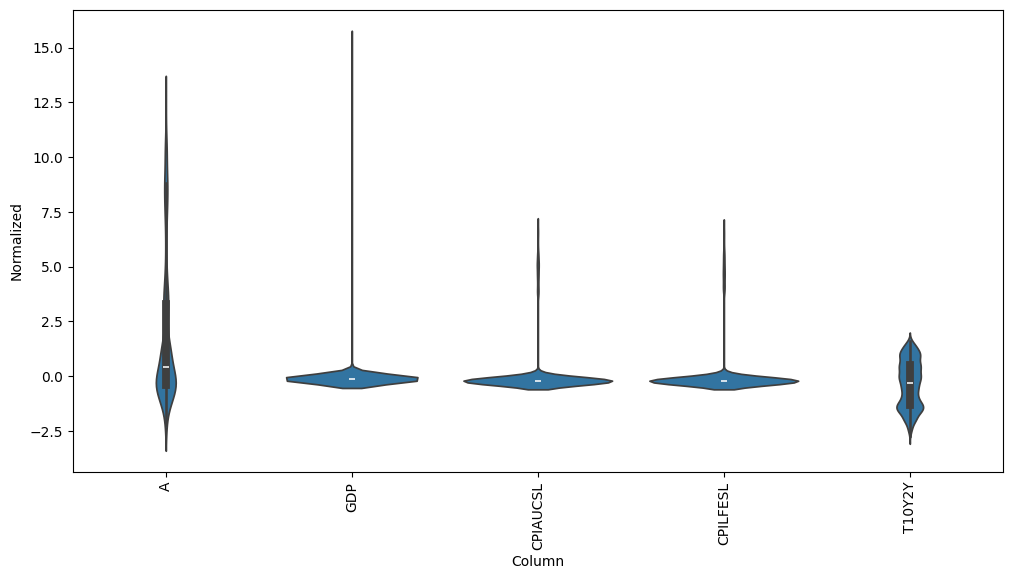

In [123]:
df_std = (data - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(data.keys(), rotation=90)

In [124]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [125]:
w1 = WindowGenerator(input_width=21, label_width=1, shift=7,
                     label_columns=['A'])
w1

Total window size: 28
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Label indices: [27]
Label column name(s): ['A']

In [126]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [127]:
import tensorflow as tf

In [128]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w1.total_window_size]),
                           np.array(train_df[100:100+w1.total_window_size]),
                           np.array(train_df[200:200+w1.total_window_size])])

example_inputs, example_labels = w1.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 28, 5)
Inputs shape: (3, 21, 5)
Labels shape: (3, 1, 1)


In [129]:
w1.example = example_inputs, example_labels

In [130]:
def plot(self, model=None, plot_col='A', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Date')

WindowGenerator.plot = plot

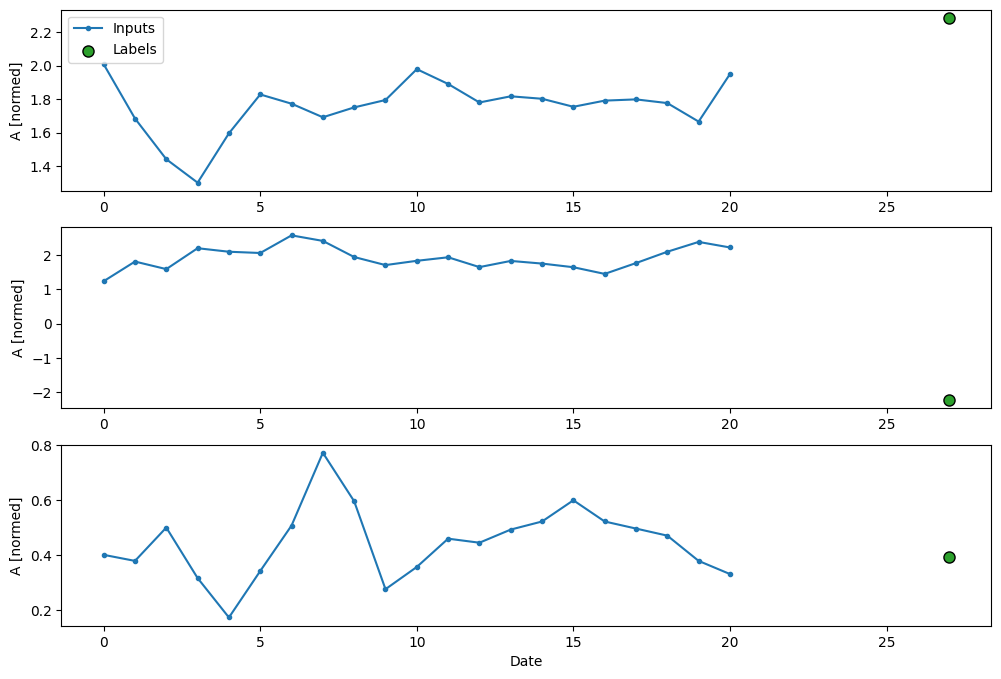

In [131]:
w1.plot()

In [132]:
#TODO: Drop Na

In [133]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [134]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [135]:
# Each element is an (inputs, label) pair.
w1.train.element_spec

(TensorSpec(shape=(None, 21, 5), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [136]:
for example_inputs, example_labels in w1.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 21, 5)
Labels shape (batch, time, features): (32, 1, 1)


2024-06-12 00:39:28.434838: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [137]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['A'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['A']

In [138]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 5)
Labels shape (batch, time, features): (32, 1, 1)


2024-06-12 00:39:28.796767: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [139]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [140]:
baseline = Baseline(label_index=column_indices['A'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val, return_dict=True)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0, return_dict=True)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7731 - mean_absolute_error: 0.3140


In [142]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=7,
    label_columns=['A'])

wide_window


Total window size: 31
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30]
Label column name(s): ['A']

In [143]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


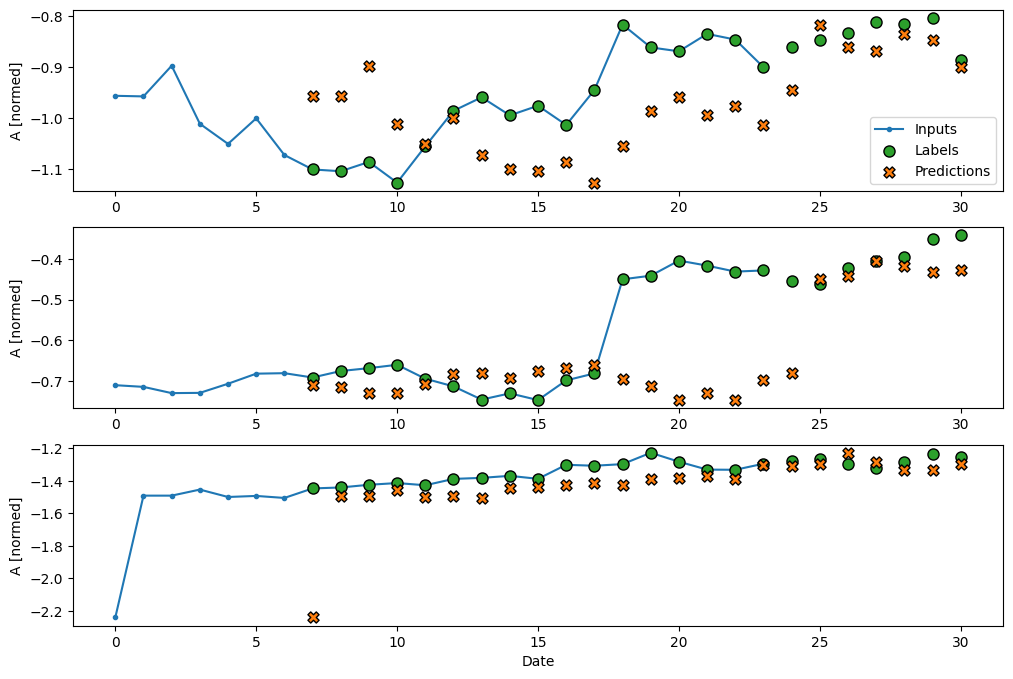

In [144]:
wide_window.plot(baseline)

## Linear model

In [145]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

In [146]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

Input shape: (32, 1, 5)
Output shape: (32, 1, 1)


In [147]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [148]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val, return_dict=True)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.2437 - mean_absolute_error: 0.8793 - val_loss: 23.4706 - val_mean_absolute_error: 4.1140
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.9368 - mean_absolute_error: 0.7672 - val_loss: 18.2705 - val_mean_absolute_error: 3.6446
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6942 - mean_absolute_error: 0.6591 - val_loss: 14.0494 - val_mean_absolute_error: 3.2038
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.5479 - mean_absolute_error: 0.5777 - val_loss: 10.7361 - val_mean_absolute_error: 2.7995
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4272 - mean_absolute_error: 0.4990 - val_loss: 8.1592 - val_mean_absolute_error: 2.4278
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3348 - mean_absolute_error: 0.4291 - val_loss: 6.2191 - val_mean_absolute_error: 2.0944
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2783 - mean_absolute_error: 0.3704

In [149]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', linear(wide_window.example[0]).shape)

Input shape: (32, 24, 5)
Output shape: (32, 24, 1)


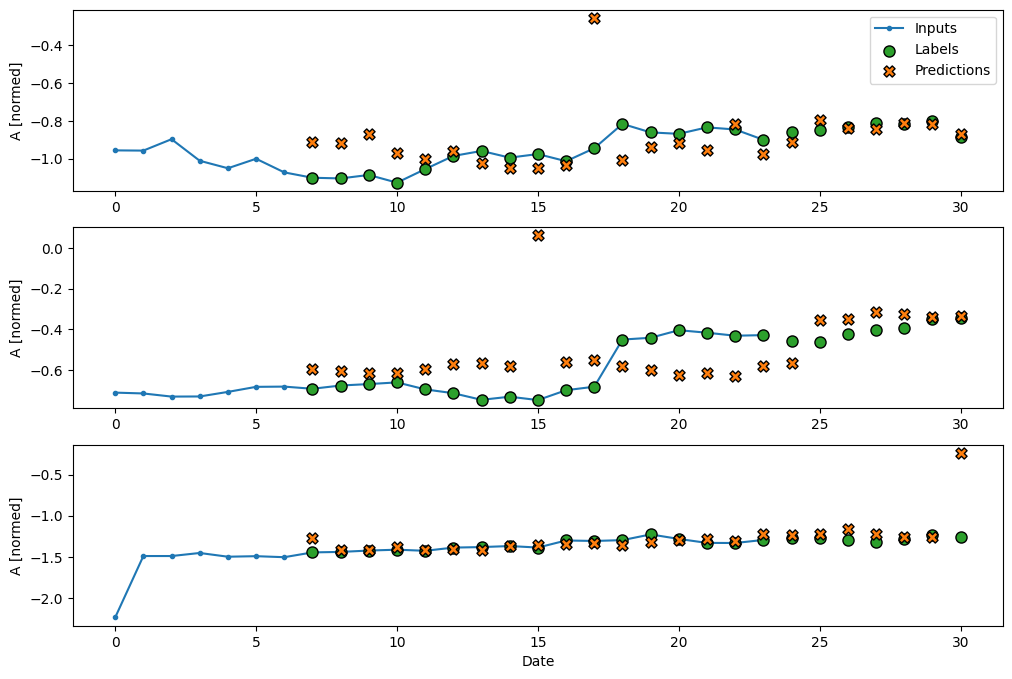

In [150]:
wide_window.plot(linear)

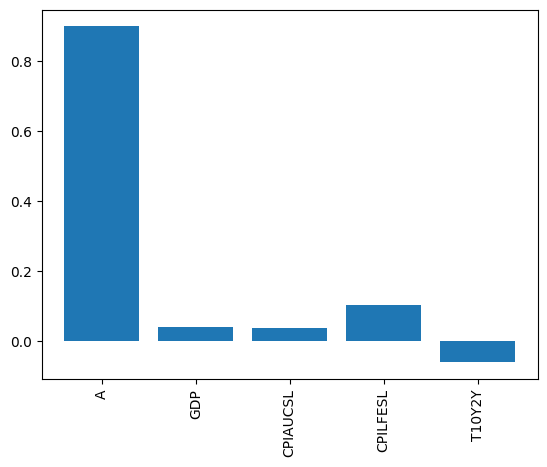

In [151]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Dense

In [152]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val, return_dict=True)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0, return_dict=True)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.3608 - mean_absolute_error: 0.3585 - val_loss: 1.6125 - val_mean_absolute_error: 0.5356
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1584 - mean_absolute_error: 0.1411 - val_loss: 1.4980 - val_mean_absolute_error: 0.4415
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1425 - mean_absolute_error: 0.1410 - val_loss: 1.4636 - val_mean_absolute_error: 0.3554
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1527 - mean_absolute_error: 0.1370 - val_loss: 1.4570 - val_mean_absolute_error: 0.3407
Epoch 5/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1489 - mean_absolute_error: 0.1432 - val_loss: 1.4262 - val_mean_absolute_error: 0.3241
Epoch 6/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.1428 - mean_absolute_error: 0.1314 - val_loss: 1.4719 - val_mean_absolute_error: 0.3321
Epoch 7/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1545 - mean_absolute_error: 0.1364 - 

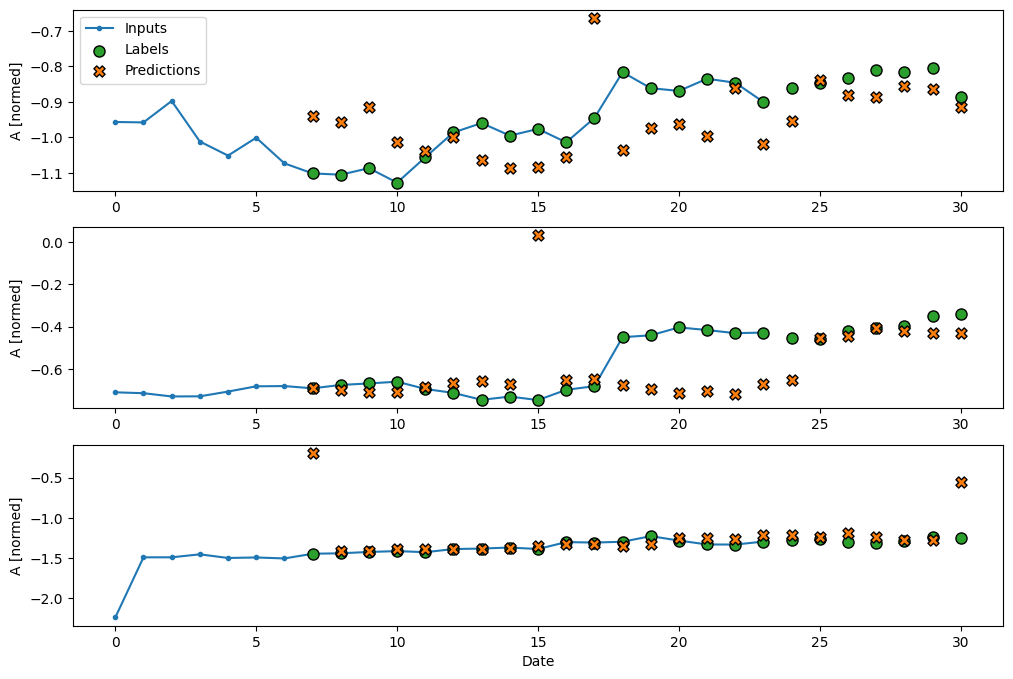

In [153]:
wide_window.plot(dense)

In [156]:
history = compile_and_fit(dense, w1)

val_performance['Dense'] = dense.evaluate(w1.val, return_dict=True)
performance['Dense'] = dense.evaluate(w1.test, verbose=0, return_dict=True)

Epoch 1/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.2443 - mean_absolute_error: 0.2415 - val_loss: 3.0399 - val_mean_absolute_error: 1.3022
Epoch 2/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2421 - mean_absolute_error: 0.2372 - val_loss: 2.9427 - val_mean_absolute_error: 1.2285
Epoch 3/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2255 - mean_absolute_error: 0.2307 - val_loss: 3.6617 - val_mean_absolute_error: 1.4808
Epoch 4/20
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.2188 - mean_absolute_error: 0.2242 - val_loss: 3.8588 - val_mean_absolute_error: 1.5196
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.1574 - mean_absolute_error: 1.5548


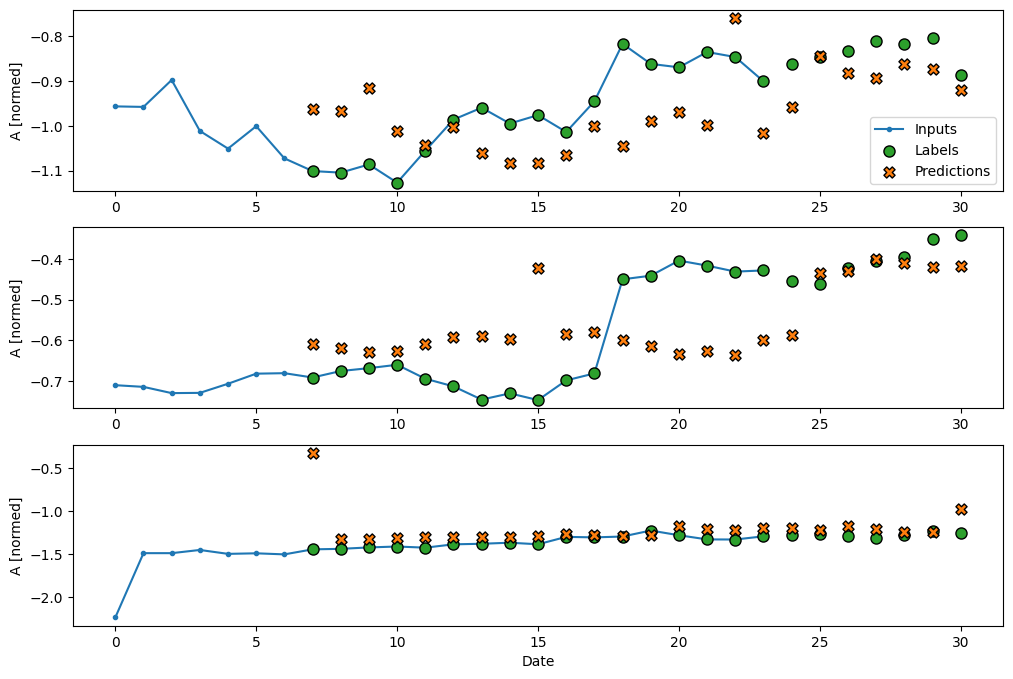

In [157]:
wide_window.plot(dense)

## Multi-step Dense

In [164]:
CONV_WIDTH = 20
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=7,
    shift=1,
    label_columns=['A'])

conv_window

Total window size: 21
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Label indices: [14 15 16 17 18 19 20]
Label column name(s): ['A']

Text(0.5, 0.98, 'Given 20 days of inputs, predict 7 days into the future.')

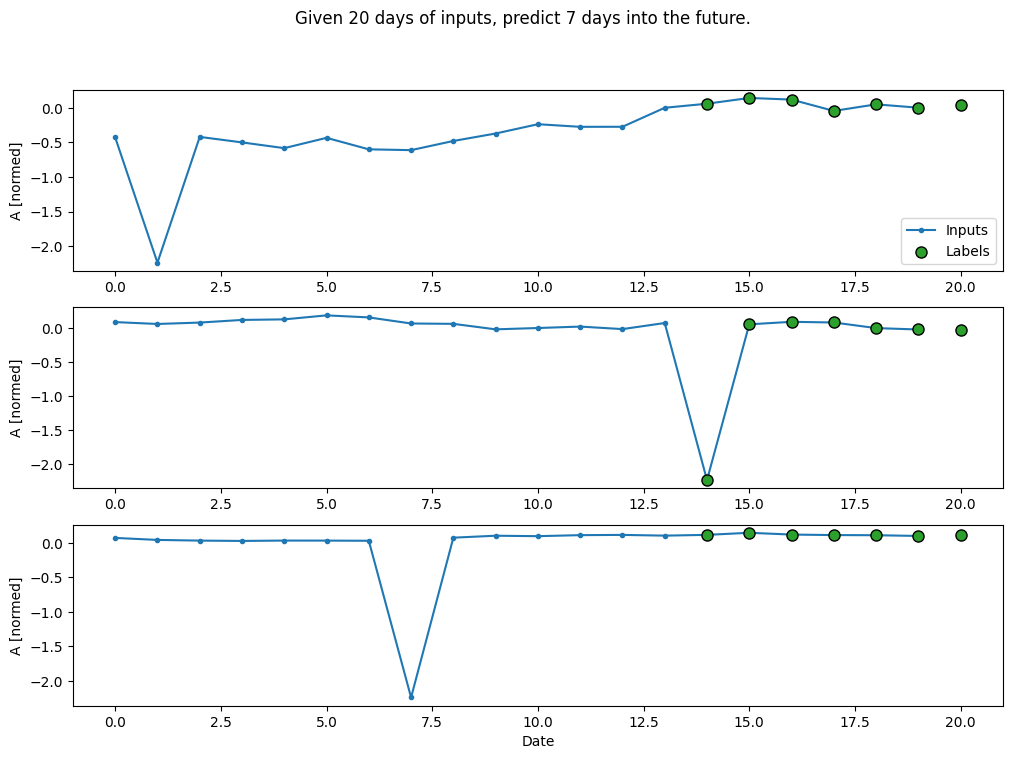

In [165]:
conv_window.plot()
plt.suptitle("Given 20 days of inputs, predict 7 days into the future.")

In [166]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [167]:
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', multi_step_dense(conv_window.example[0]).shape)

Input shape: (32, 20, 5)
Output shape: (32, 1, 1)


In [169]:
history = compile_and_fit(multi_step_dense, conv_window)

# IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val, return_dict=True)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0, return_dict=True)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1131 - mean_absolute_error: 0.1327 - val_loss: 0.8975 - val_mean_absolute_error: 0.3986
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1117 - mean_absolute_error: 0.1316 - val_loss: 0.8898 - val_mean_absolute_error: 0.3926
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1114 - mean_absolute_error: 0.1302 - val_loss: 0.9551 - val_mean_absolute_error: 0.4791
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1146 - mean_absolute_error: 0.1338 - val_loss: 0.9352 - val_mean_absolute_error: 0.4629
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8922 - mean_absolute_error: 0.4615


ValueError: x and y must be the same size

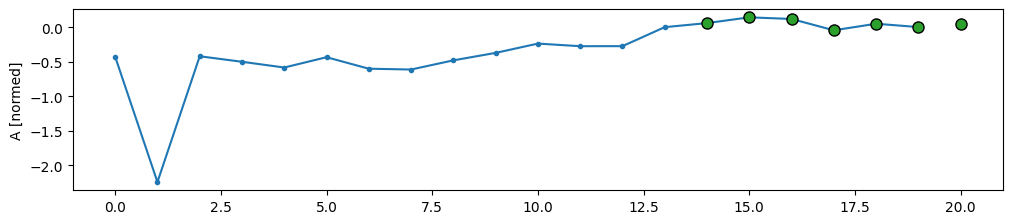

In [170]:
conv_window.plot(multi_step_dense)

## Convolutional Neural Network

In [171]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [172]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)

Conv model on `conv_window`
Input shape: (32, 20, 5)
Output shape: (32, 1, 1)


In [174]:
history = compile_and_fit(conv_model, conv_window)

# IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val, return_dict=True)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0, return_dict=True)

Epoch 1/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.1150 - mean_absolute_error: 0.1425 - val_loss: 0.8822 - val_mean_absolute_error: 0.3871
Epoch 2/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1158 - mean_absolute_error: 0.1351 - val_loss: 0.8609 - val_mean_absolute_error: 0.3530
Epoch 3/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1171 - mean_absolute_error: 0.1314 - val_loss: 0.8711 - val_mean_absolute_error: 0.3755
Epoch 4/20
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1147 - mean_absolute_error: 0.1292 - val_loss: 0.8983 - val_mean_absolute_error: 0.4281
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9118 - mean_absolute_error: 0.4213


In [178]:
conv_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (32, 1, 32)            │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 1, 32)            │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 1, 1)             │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,965 (50.65 KB)

 Trainable params: 4,321 (16.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,644 (33.77 KB)

In [ ]:
predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)